# 🤖 How to apply machine learning models

**Note**
- doing machine learning in python is actually the simpler task in the process
- but an unclear structure can make it hard to memorize
- in this notebook im going to make things a lot clearer

# STEP 1 | LETS START WITH DATA 📊

In [118]:
# in this example were going to use the titanic dataset
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')

### making the data machine learning worthy

In [121]:
# lets look at the data
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: >

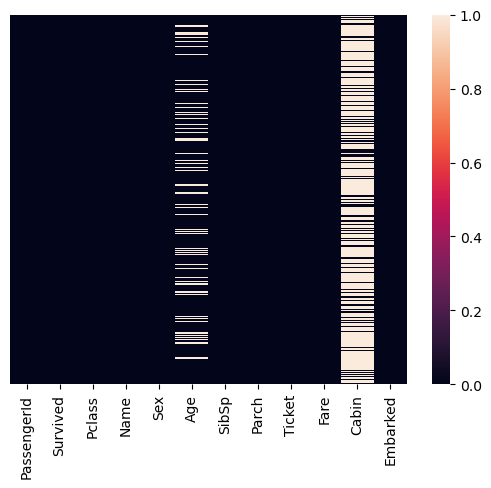

In [123]:
import seaborn as sns
sns.heatmap(train.isnull(),yticklabels=False, cbar=True)

### One way to get the null values fixed
- use categorical values and find the connection between it

In [126]:
# LOGIC : the more expensive the ticker, the wealthier the person, and usually older people are richer 
# so we use that

In [128]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [130]:
# as the example above shows that the older someone is the richer they become
def fixage(columns):
    age = columns.iloc[0]
    pclass = columns.iloc[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38.23
        elif pclass == 2:
            return 29.87
        else:
            return 25.14
    else:
        return age

train['Age'] = train[['Age','Pclass']].apply(fixage, axis=1)

In [132]:
continuous = train.select_dtypes(include='number').drop(columns=['PassengerId'])
continuous

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.00,1,0,7.2500
1,1,1,38.00,1,0,71.2833
2,1,3,26.00,0,0,7.9250
3,1,1,35.00,1,0,53.1000
4,0,3,35.00,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.00,0,0,13.0000
887,1,1,19.00,0,0,30.0000
888,0,3,25.14,1,2,23.4500
889,1,1,26.00,0,0,30.0000


<Axes: xlabel='Fare', ylabel='Count'>

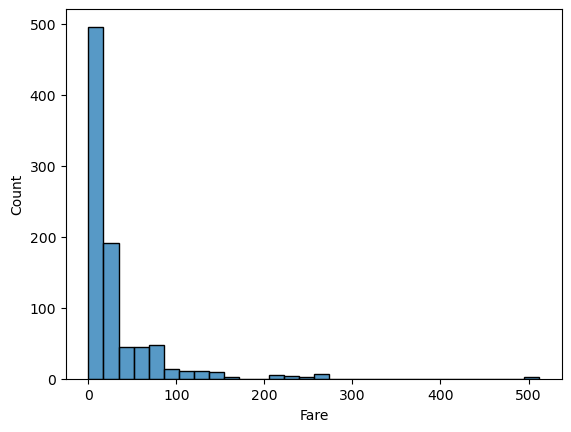

In [134]:
sns.histplot(data=continuous,x='Fare', bins=30)

In [136]:
continuous['Fare'] = continuous['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

In [138]:
continuous

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.00,1,0,1.981001
1,1,1,38.00,1,0,4.266662
2,1,3,26.00,0,0,2.070022
3,1,1,35.00,1,0,3.972177
4,0,3,35.00,0,0,2.085672
...,...,...,...,...,...,...
886,0,2,27.00,0,0,2.564949
887,1,1,19.00,0,0,3.401197
888,0,3,25.14,1,2,3.154870
889,1,1,26.00,0,0,3.401197


In [140]:
categorical = train.select_dtypes(include='object').drop(columns=['Cabin','Name','Ticket'])
categorical = pd.get_dummies(categorical, drop_first=True).astype(int)
categorical

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [142]:
# make it into one
training = pd.concat([categorical,continuous], axis=1)
x = training.drop(columns=['Survived'])
y = training['Survived']

In [146]:
x

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,3,22.00,1,0,1.981001
1,0,0,0,1,38.00,1,0,4.266662
2,0,0,1,3,26.00,0,0,2.070022
3,0,0,1,1,35.00,1,0,3.972177
4,1,0,1,3,35.00,0,0,2.085672
...,...,...,...,...,...,...,...,...
886,1,0,1,2,27.00,0,0,2.564949
887,0,0,1,1,19.00,0,0,3.401197
888,0,0,1,3,25.14,1,2,3.154870
889,1,0,0,1,26.00,0,0,3.401197


In [152]:
# standard scaler 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# using different scalers for different purposes
x[['Age']] = StandardScaler().fit_transform(x[['Age']])
x[['Fare']] = RobustScaler().fit_transform(x[['Fare']])

In [154]:
x

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,3,-0.552339,1,0,-0.505182
1,0,0,0,1,0.659501,1,0,1.168300
2,0,0,1,3,-0.249379,0,0,-0.440004
3,0,0,1,1,0.432281,1,0,0.952688
4,1,0,1,3,0.432281,0,0,-0.428546
...,...,...,...,...,...,...,...,...
886,1,0,1,2,-0.173639,0,0,-0.077636
887,0,0,1,1,-0.779559,0,0,0.534637
888,0,0,1,3,-0.314516,1,2,0.354284
889,1,0,0,1,-0.249379,0,0,0.534637


In [158]:
# okay now lets split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [167]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
predictor = model.fit(x_train,y_train)
y_pred = predictor.predict(x_test)

score = accuracy_score(y_pred,y_test)
score

0.8156424581005587

In [175]:
! pip install xgboost

In [177]:
import xgboost as xgb 
use_label_encoder=False, eval_metric='mlogloss')

In [187]:
xgboost = xgb.XGBClassifier(eval_metric='mlogloss')

In [189]:
xgboost_trained = xgboost.fit(x_train, y_train)
y_pred = xgboost_trained.predict(x_test)
score = accuracy_score(y_pred,y_test)
matrix = confusion_matrix(y_pred, y_test)
print(score,matrix)

0.8156424581005587 [[89 17]
 [16 57]]
